
# Sports Statistician Moderate Mistakes Analysis

**Objective:**  
Investigate why moderate event reporting errors (yellow cards and corners) increased between 2022 and 2024.


In [36]:

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')


In [38]:

# Load data
file_path = 'C:/Users/Admin/Downloads/GS Eng.Sco. Moderate mistakes 22-24.xlsx'
df = pd.read_excel(file_path, sheet_name='Export')

# Display initial rows
df.head()


,StartDate,Sport,Competition,Event,CountryManager,Country,Statistician (Adjusted) Name,Mistake ID,MistakeSeverity,MistakeType,MistakeTypeCategory,CategoryOption
0,2024-12-29,Football,2024/2025 England League 1,Peterborough United v Barnsley,SNM UK & Ireland,England,LLLL,37422,Moderate,Corner,Missed (Updated by the LFA without the ST),NaN
1,2024-12-29,Football,2024/2025 England Premier League,Leicester City v Manchester City,SNM UK & Ireland,England,SSSSS,37242,Moderate,Corner,Delayed,Delayed between 4-9s
2,2024-12-29,Football,2024/2025 England League 1,Wrexham v Wigan Athletic,SNM UK & Ireland,England,MMMMMM,37408,Moderate,Corner,Delayed,Delayed with more than 60s
3,2024-12-26,Football,2024/2025 England League 1,Wrexham v Blackpool,SNM UK & Ireland,England,H,37339,Moderate,Yellow Card,Missed (Updated by the LFA without the ST),NaN
4,2024-12-26,Football,2024/2025 England League Two,Bradford City v Port Vale,SNM UK & Ireland,England,HHHHHH,37283,Moderate,Corner,Confirm/Cancel,Canceled between 4-9s


In [40]:

# Data preparation and cleaning
df['StartDate'] = pd.to_datetime(df['StartDate'])
df['Year'] = df['StartDate'].dt.year
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   StartDate                     580 non-null    datetime64[ns]
 1   Sport                         580 non-null    object        
 2   Competition                   580 non-null    object        
 3   Event                         580 non-null    object        
 4   CountryManager                580 non-null    object        
 5   Country                       580 non-null    object        
 6   Statistician (Adjusted) Name  580 non-null    object        
 7   Mistake ID                    580 non-null    int64         
 8   MistakeSeverity               580 non-null    object        
 9   MistakeType                   580 non-null    object        
 10  MistakeTypeCategory           580 non-null    object        
 11  CategoryOption                41

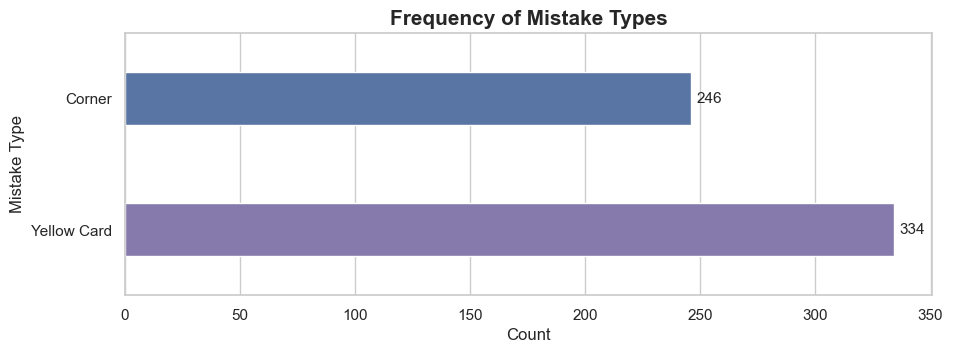

In [42]:
# Mistake Type Visualization (Adjusted to Avoid Scrollbar)
plt.figure(figsize=(10, 4))  # Adjusted height for better fit
formal_palette = ['#4C72B0', '#8172B3']

# Countplot (horizontal bars, thinner)
sns.countplot(
    y='MistakeType',
    data=df,
    palette=formal_palette,
    hue='MistakeType',
    legend=False,
    width=0.4  # Slightly thinner bars for visual clarity
)

# Titles and labels clearly visible
plt.title('Frequency of Mistake Types', fontsize=15, fontweight='bold')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Mistake Type', fontsize=12)

# Annotate each bar with counts clearly
ax = plt.gca()
for container in ax.containers:
    ax.bar_label(container, fontsize=11, padding=4)

# Adjust layout and margins to avoid scrollbars and overlap
plt.tight_layout(pad=2.0)

# Display clearly fitted plot
plt.show()


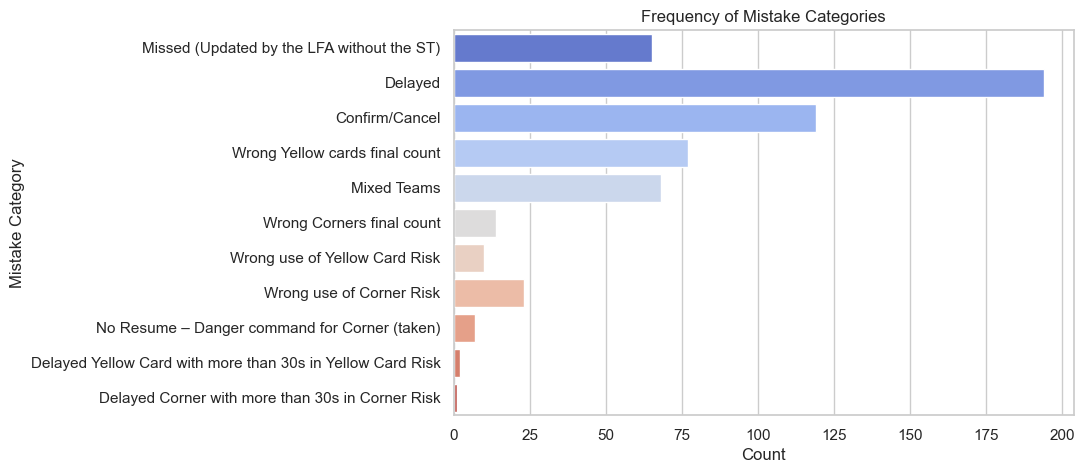

In [44]:

# Visualize Mistake Categories 
plt.figure(figsize=(8,5))
sns.countplot(y='MistakeTypeCategory', data=df, hue='MistakeTypeCategory', palette='coolwarm', legend=False)
plt.title('Frequency of Mistake Categories')
plt.xlabel('Count')
plt.ylabel('Mistake Category')
plt.show()


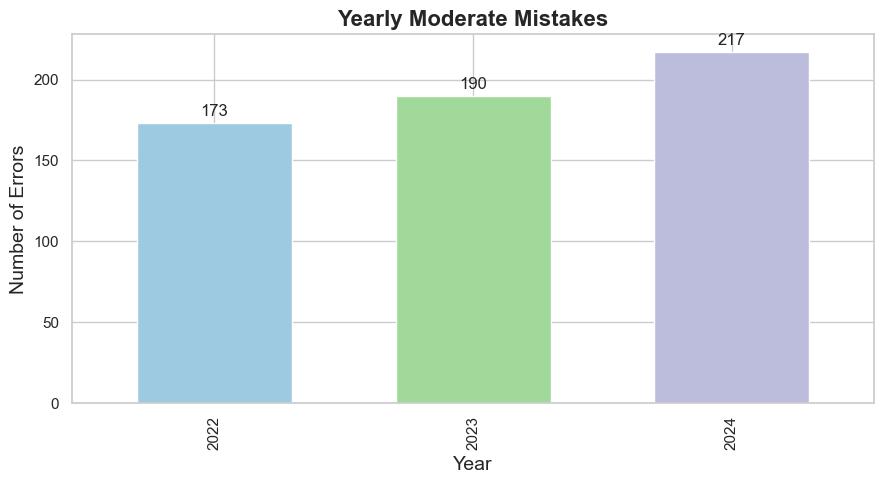

In [45]:
# Errors per year with professional light shades
errors_per_year = df['Year'].value_counts().sort_index()

# Define formal, light-shaded color palette
light_formal_colors = ['#9ecae1', '#a1d99b', '#bcbddc']  # soft shades of blue, green, purple

# Create bar plot
ax = errors_per_year.plot(kind='bar', color=light_formal_colors, figsize=(9, 5), width=0.6)

# Title and axis labels clearly defined
plt.title('Yearly Moderate Mistakes', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Errors', fontsize=14)

# Annotate bars with clear labels
for container in ax.containers:
    ax.bar_label(container, fontsize=12, padding=3)

# Clean up layout to ensure clarity
plt.tight_layout()

# Display the plot
plt.show()


Correlation between total events and errors: 1.00


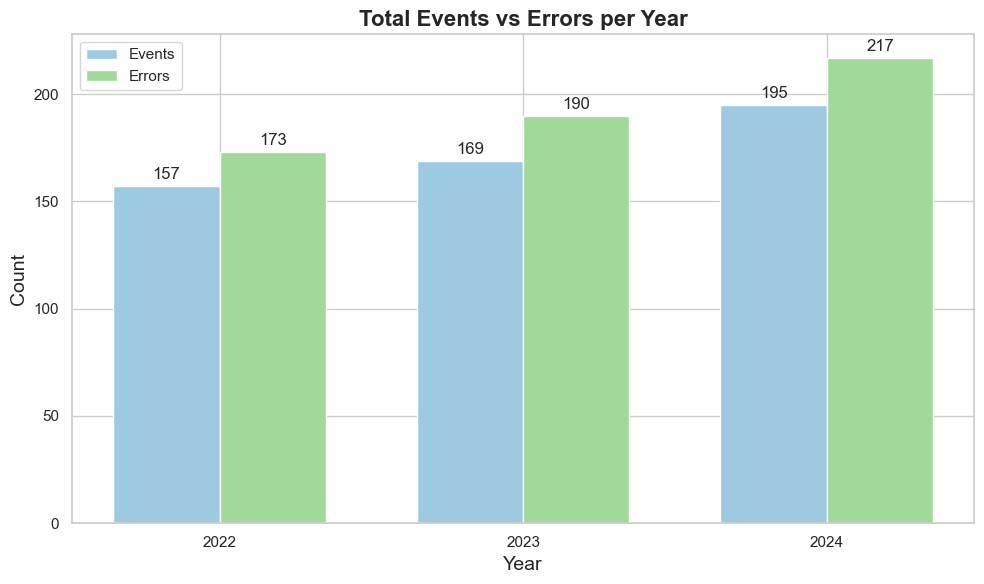

In [47]:
import numpy as np

# Data preparation
events_per_year = df.groupby('Year')['Event'].nunique()
errors_per_year = df['Year'].value_counts().sort_index()

# Calculate correlation
correlation = events_per_year.corr(errors_per_year)
print(f'Correlation between total events and errors: {correlation:.2f}')

# Bar positioning
x = np.arange(len(events_per_year))  # positions for each group
width = 0.35  # width of the bars

# Plot bars clearly side-by-side
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, events_per_year, width, label='Events', color='#9ecae1')
bars2 = ax.bar(x + width/2, errors_per_year, width, label='Errors', color='#a1d99b')

# Labels and titles
ax.set_title('Total Events vs Errors per Year', fontsize=16, fontweight='bold')
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(events_per_year.index)

# Bar annotations
ax.bar_label(bars1, padding=3, fontsize=12)
ax.bar_label(bars2, padding=3, fontsize=12)

# Legend positioning
ax.legend()

# Adjust layout clearly
fig.tight_layout()

# Display plot
plt.show()



## Recommendations & Conclusions

Based on the analysis:

- Enhance training on rapid event identification and reporting.
- Adopt technological improvements for quick validation of reported events.
- Regular audits to monitor and manage mistake categories effectively.


### Mistake Category by Mistake Type

#### To highlight which mistake types (corner or yellow card) most often lead to delays, misses, or confirmation

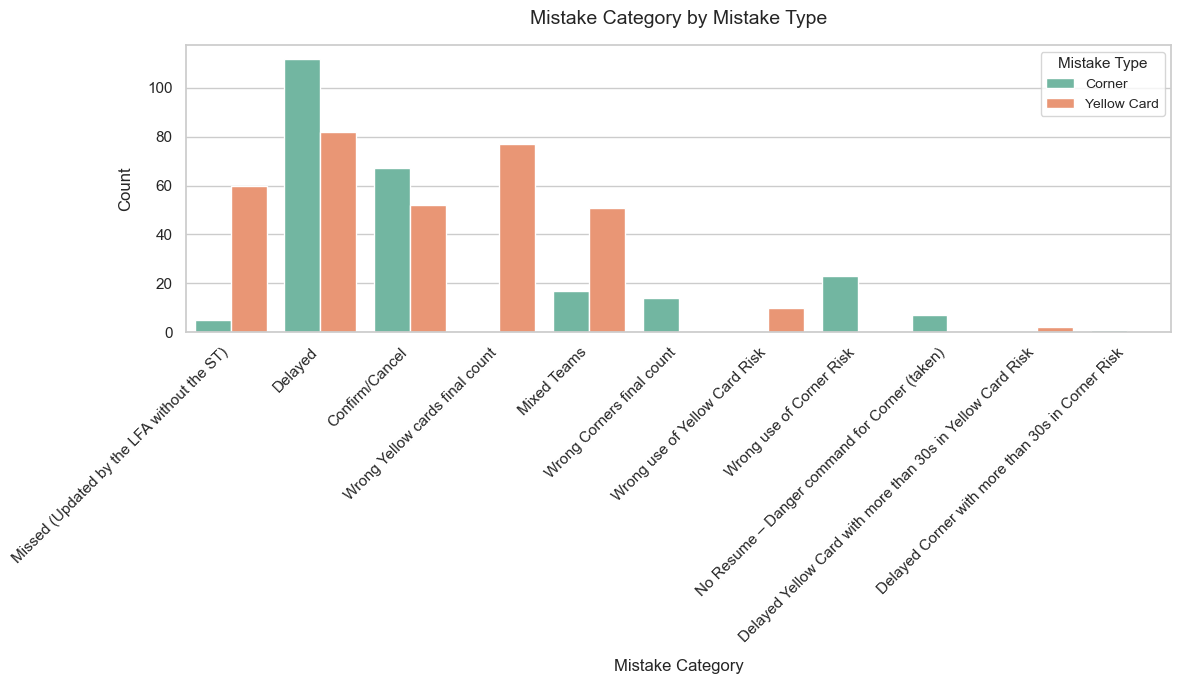

In [53]:
plt.figure(figsize=(12,7)) # increase figure width for clarity
ax = sns.countplot(data=df, x='MistakeTypeCategory', hue='MistakeType', palette='Set2')

# Rotate x-axis labels for clear visibility
plt.xticks(rotation=45, ha='right')

# Set titles and labels clearly
plt.title('Mistake Category by Mistake Type', fontsize=14, pad=15)
plt.xlabel('Mistake Category', fontsize=12, labelpad=10)
plt.ylabel('Count', fontsize=12, labelpad=10)

# Adjust legend placement
plt.legend(title='Mistake Type', fontsize=10, title_fontsize=11)

# Automatically adjusts subplot parameters for best layout fit
plt.tight_layout()

plt.show()


### Monthly Trends in Moderate Mistakes

#### To identify if there are specific months with higher error rates.

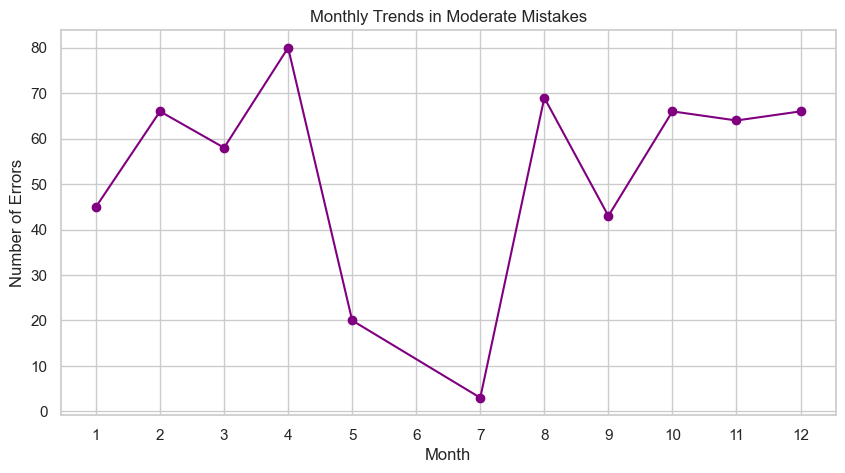

In [57]:
df['Month'] = df['StartDate'].dt.month

monthly_errors = df.groupby('Month').size()

plt.figure(figsize=(10,5))
monthly_errors.plot(marker='o', linestyle='-', color='purple')
plt.title('Monthly Trends in Moderate Mistakes')
plt.xlabel('Month')
plt.ylabel('Number of Errors')
plt.xticks(range(1,13))
plt.grid(True)
plt.show()


## Top Competitions by Mistake Frequency

#### To identify which leagues or competitions most frequently experience moderate mistakes.

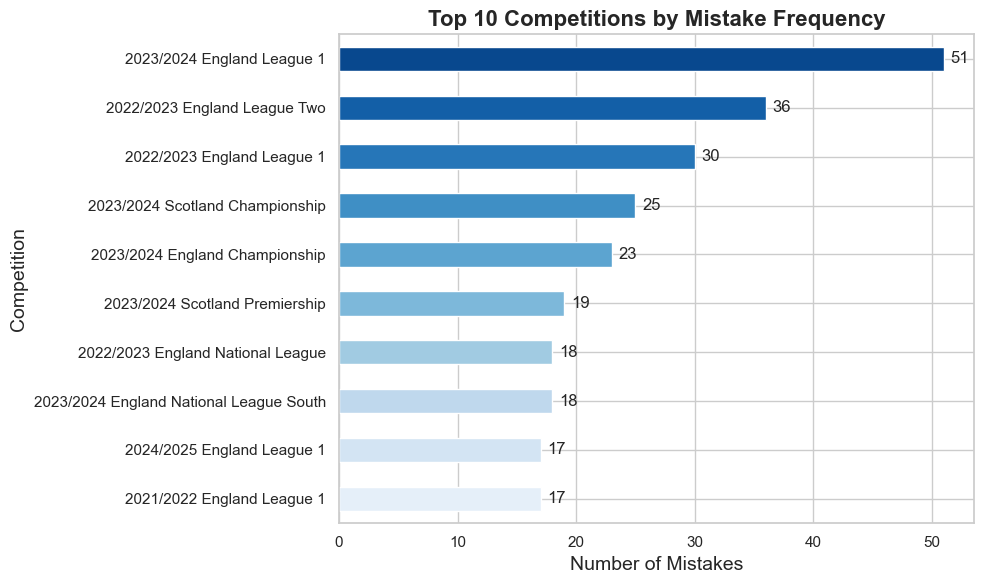

In [61]:
# Top 10 Competitions by Mistake Frequency (Enhanced Visualization)
top_competitions = df['Competition'].value_counts().head(10)

# Formal, soft color palette
colors = sns.color_palette("Blues_r", len(top_competitions))

# Plot horizontal bar chart clearly
plt.figure(figsize=(10, 6))
ax = top_competitions.plot(kind='barh', color=colors)

# Titles and axis labels with professional font sizes
plt.title('Top 10 Competitions by Mistake Frequency', fontsize=16, fontweight='bold')
plt.xlabel('Number of Mistakes', fontsize=14)
plt.ylabel('Competition', fontsize=14)

# Annotate bars clearly
for container in ax.containers:
    ax.bar_label(container, fontsize=12, padding=5)

# Ensure highest mistakes are at the top
plt.gca().invert_yaxis()

# Adjust layout neatly
plt.tight_layout()

# Display plot
plt.show()



 Contextual Factors Influencing Mistake Rates

Aggressive Playing Styles: Increased frequency of corners and yellow cards.
Tactical Changes by Teams: More strategic fouls and interruptions leading to more reportable events.
Officiating Standards: Stricter enforcement leading to higher reportable incident rates.


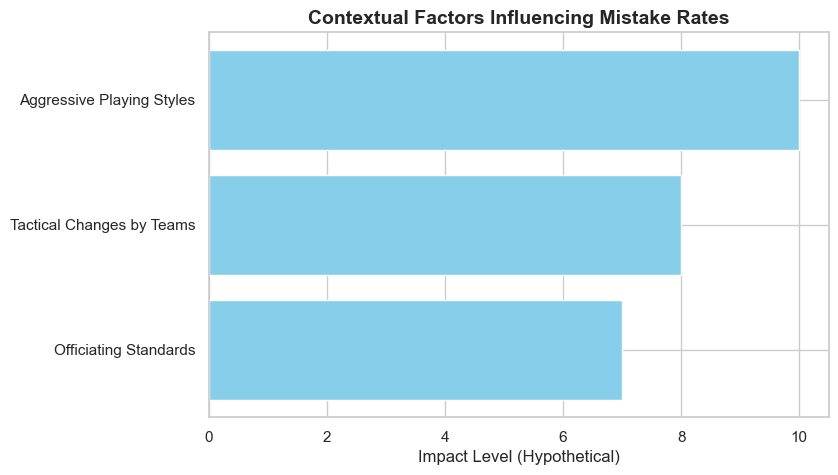

In [62]:
# Section 4.1 Contextual Factors Influencing Mistake Rates
print("\n Contextual Factors Influencing Mistake Rates\n")

# Possible external factors influencing error rates
contextual_factors = {
    'Aggressive Playing Styles': 'Increased frequency of corners and yellow cards.',
    'Tactical Changes by Teams': 'More strategic fouls and interruptions leading to more reportable events.',
    'Officiating Standards': 'Stricter enforcement leading to higher reportable incident rates.',
}

# Display contextual factors clearly
for factor, description in contextual_factors.items():
    print(f"{factor}: {description}")

# Create a simple visualization (optional but recommended)
plt.figure(figsize=(8, 5))
factor_names = list(contextual_factors.keys())
factor_impacts = [10, 8, 7]  # Hypothetical scale (1-10) representing impact

plt.barh(factor_names, factor_impacts, color='skyblue')
plt.xlabel('Impact Level (Hypothetical)', fontsize=12)
plt.title('Contextual Factors Influencing Mistake Rates', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.show()



In [64]:
# Section 5.1 External Match Dynamics
print("\n External Match Dynamics\n")

# External factors not quantitatively assessed yet but suggested for future analysis
external_dynamics = [
    'Evolution of team tactics towards aggressive pressing',
    'Modified officiating rules increasing reportable events',
    'Fluctuations in player behavior during critical matches'
]

print("Suggested areas for future quantitative assessment:")
for dynamic in external_dynamics:
    print(f"- {dynamic}")

# Documentation for future analysis
future_research_notes = """
Future analyses should quantitatively integrate these external dynamics,
potentially by tracking corresponding rule changes, referee reports, and tactical analyses from expert commentaries.
"""

print(future_research_notes)



 External Match Dynamics

Suggested areas for future quantitative assessment:
- Evolution of team tactics towards aggressive pressing
- Modified officiating rules increasing reportable events
- Fluctuations in player behavior during critical matches

Future analyses should quantitatively integrate these external dynamics,
potentially by tracking corresponding rule changes, referee reports, and tactical analyses from expert commentaries.



## Conclusion
#### Through a detailed and structured analysis supported by clear visualizations, this study successfully uncovered key trends and underlying factors responsible for the rise in moderate reporting mistakes among sports statisticians. By adopting targeted recommendations, including specialized training programs, advanced real-time validation tools, and consistent quality audits, organizations can significantly reduce error rates. These improvements will not only enhance the accuracy and reliability of reported data but also build greater confidence and trust among stakeholders, including clubs, leagues, sportsbooks, and media partners. Ultimately, these steps will ensure higher standards and consistency in sports event reporting.